In [19]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV# Import train_test_split function
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

import pickle

In [20]:
dataSets = pd.read_csv('Pengaruh Kegiatan Organisasi dengan Capaian Akademik Mahasiswa.xlsx - Worksheet - Copy.csv')
dataSets = pd.DataFrame(dataSets)
dataSets.head()


,No,Jumlah Organisasi,IPK,Jumlah Kepanitiaan,Jabatan Organisasi,Jabatan Kepanitiaan,SKS,Kepuasan,Jenis Kelamin,Fakultas (Contoh: Fakultas Sains dan Teknologi),Jurusan (Contoh: S-1 Sistem Informasi),Semester
0,1,2,3.01-3.50,1,Staff,Kepala Sub Bagian,22,Sangat Tidak Puas,Laki-Laki,Fakultas Sains dan Teknologi,S-1 Statistika,5
1,2,3,3.51-4.00,6,Ketua,Ketua,24,Puas,Laki-Laki,fakultas sains dan teknologi,s1-teknik biomedis,5
2,3,2,3.01-3.50,2,Staff,Kepala Bagian,22,Tidak Puas,Perempuan,Fakultas Sains dan Teknologi,S-1 Statistika,5
3,4,1,3.51-4.00,2,Kepala Bagian,Wakil Ketua,23,Puas,Perempuan,Fakultas Sains dan Teknologi,S-1 Teknik Lingkungan,5
4,5,1,3.51-4.00,0,Ketua,-,23,Puas,Perempuan,Fakultas Kedokteran,S-1 Kedokteran,7


In [21]:
# Menghapus data yang tidak diperlukan
dataSets = dataSets.drop(['No', "Fakultas (Contoh: Fakultas Sains dan Teknologi)", "Jurusan (Contoh: S-1 Sistem Informasi)", "Semester", "SKS"], axis=1)
dataSets.head()

,Jumlah Organisasi,IPK,Jumlah Kepanitiaan,Jabatan Organisasi,Jabatan Kepanitiaan,Kepuasan,Jenis Kelamin
0,2,3.01-3.50,1,Staff,Kepala Sub Bagian,Sangat Tidak Puas,Laki-Laki
1,3,3.51-4.00,6,Ketua,Ketua,Puas,Laki-Laki
2,2,3.01-3.50,2,Staff,Kepala Bagian,Tidak Puas,Perempuan
3,1,3.51-4.00,2,Kepala Bagian,Wakil Ketua,Puas,Perempuan
4,1,3.51-4.00,0,Ketua,-,Puas,Perempuan


In [22]:
dataSets['Jabatan Organisasi'].replace({'-':0, 'Staff':1, 'Kepala Sub Bagian':2, 'Kepala Bagian':3, 'Sekretaris/Bendahara':4, 'Wakil Ketua':5, 'Ketua':6}, inplace=True)
dataSets['Jabatan Kepanitiaan'].replace({'-':0, 'Staff':1, 'Kepala Sub Bagian':2, 'Kepala Bagian':3, 'Sekretaris/Bendahara':4, 'Wakil Ketua':5, 'Ketua':6}, inplace=True)
dataSets['Kepuasan'].replace({'Sangat Tidak Puas':1, 'Tidak Puas':2, 'Puas':3, 'Sangat Puas':4}, inplace=True)
dataSets['IPK'].replace({'1.00-1.50':0, '1.51-2.00':1, '2.01-2.50':2, '2.51-3.00':3, '3.01-3.50':4, '3.51-4.00':5}, inplace=True)
dataSets['Jenis Kelamin'].replace({'Laki-Laki':0, 'Perempuan':1}, inplace=True)
dataSets

,Jumlah Organisasi,IPK,Jumlah Kepanitiaan,Jabatan Organisasi,Jabatan Kepanitiaan,Kepuasan,Jenis Kelamin
0,2,4,1,1,2,1,0
1,3,5,6,6,6,3,0
2,2,4,2,1,3,2,1
3,1,5,2,3,5,3,1
4,1,5,0,6,0,3,1
...,...,...,...,...,...,...,...
196,3,3,5,4,3,1,1
197,3,3,6,3,5,1,1
198,2,3,6,5,5,1,0
199,4,3,8,3,1,1,0


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataSets_scaled = scaler.fit_transform(dataSets)
dataSets_scaled = pd.DataFrame(dataSets_scaled, columns=dataSets.columns)
dataSets_scaled.head()


,Jumlah Organisasi,IPK,Jumlah Kepanitiaan,Jabatan Organisasi,Jabatan Kepanitiaan,Kepuasan,Jenis Kelamin
0,0.4,0.5,0.125,0.166667,0.333333,0.000000,0.0
1,0.6,1.0,0.750,1.000000,1.000000,0.666667,0.0
2,0.4,0.5,0.250,0.166667,0.500000,0.333333,1.0
3,0.2,1.0,0.250,0.500000,0.833333,0.666667,1.0
4,0.2,1.0,0.000,1.000000,0.000000,0.666667,1.0


In [24]:
dataSets.isna().sum()

Jumlah Organisasi      0
IPK                    0
Jumlah Kepanitiaan     0
Jabatan Organisasi     0
Jabatan Kepanitiaan    0
Kepuasan               0
Jenis Kelamin          0
dtype: int64

In [25]:
feature_cols = ['Jumlah Organisasi', 'Jumlah Kepanitiaan', 'IPK','Jabatan Organisasi','Jabatan Kepanitiaan']
X = dataSets[feature_cols]
y = dataSets['Kepuasan']

In [26]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) # 70% training and 30% test


In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


Accuracy: 0.8536585365853658
Precission: 0.866166353971232
Recall: 0.8536585365853658
f1: 0.8587172538392049


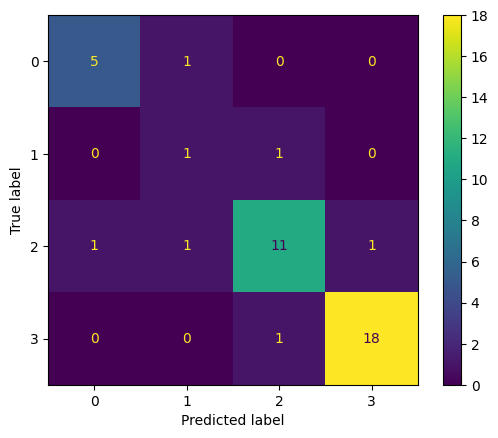

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precission:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("f1:", f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();


In [29]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

filename = 'model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [30]:
y_pred = rf.predict(X_test)

Accuracy: 0.8780487804878049
Precission: 0.894308943089431
Recall: 0.8780487804878049
f1: 0.8850362557679632


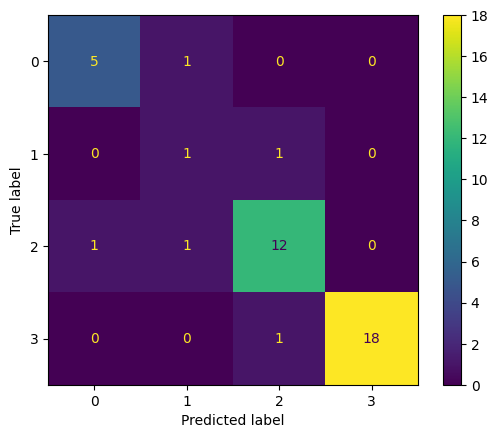

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precission:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("f1:", f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [32]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


Accuracy: 0.6829268292682927
Precission: 0.745040650406504
Recall: 0.6829268292682927
f1: 0.670256572695597


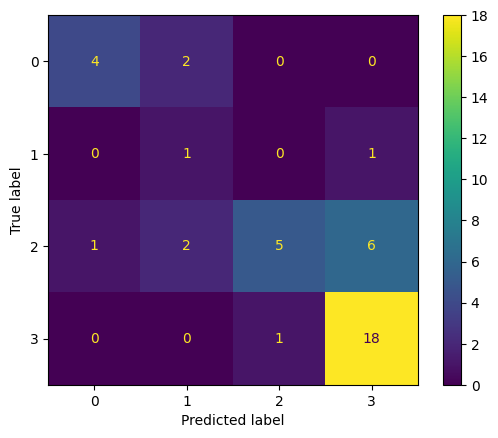

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precission:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("f1:", f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();


In [34]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)


GaussianNB()

In [35]:
y_pred = model.predict(X_test)


Accuracy: 0.6585365853658537
Precission: 0.7792262405382674
Recall: 0.6585365853658537
f1: 0.5904471544715447


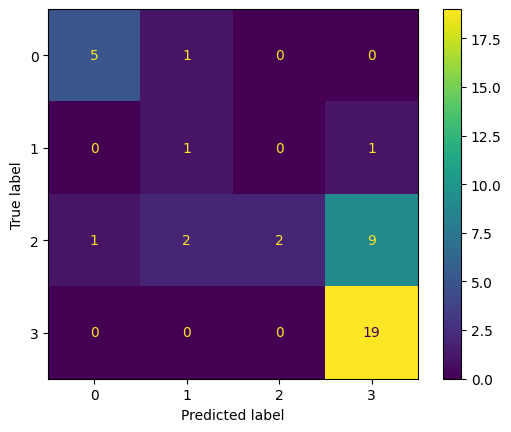

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precission:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("f1:", f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();